**PROJECT 2: LINEAR REGRESSION**

**JAYASHREE JOHNSON**  
**CS675 INTRODUCTION TO DATA SCIENCE**

**Step#1 INSTALL & IMPORT REQUIRED LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

**Step#2 LOAD & INSPECT DATA**

In [ ]:
url = "https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data"
column_names = [
    'age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'y'
]

df = pd.read_csv(url,delim_whitespace=True, header=None, names=column_names)

Here, I separate `X` (input features) and `y` (the target variable for disease progression).

In [ ]:
X = df.drop(columns='y')
y = df['y']
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
1,59,2,32.1,101,157,93.2,38,4,4.8598,87,151
2,48,1,21.6,87,183,103.2,70,3,3.8918,69,75
3,72,2,30.5,93,156,93.6,41,4,4.6728,85,141
4,24,1,25.3,84,198,131.4,40,5,4.8903,89,206


**Step#3 DATA CLEANING**

Although the dataset is mostly clean, I apply a safety step to ensure that:
- All feature values are numeric (`pd.to_numeric`)
- Any unexpected non-numeric or missing values are converted to NaN and then dropped

This avoids errors when fitting the regression model and ensures our dataset is ready for modeling.  
I also re-align the target `y` to match the cleaned `X` in case any rows were dropped.

In [ ]:
X = X.apply(pd.to_numeric, errors='coerce')
X.dropna(inplace=True)
y = y[X.index]

**TASK#1: SINGLE FEATURE PREDICTION**

In this step, I fit a Linear Regression model using each individual feature from `X` to predict the target `y`.

I evaluate each model using **Mean Squared Error (MSE)** — the feature with the lowest MSE is considered the best predictor on its own.

This gives us a baseline understanding of which variable carries the most predictive power when used alone.

In [ ]:
best_mse = float('inf')
best_feature = None
best_model = None
best_predictions = None

for col in X.columns:
    X_col = X[[col]]
    model = LinearRegression().fit(X_col, y)
    y_pred = model.predict(X_col)
    mse = mean_squared_error(y, y_pred)

    print(f"{col} - MSE: {mse:.2f}")

    if mse < best_mse:
        best_mse = mse
        best_feature = col
        best_model = model
        best_predictions = y_pred

print("\nBest single feature:", best_feature)
print("→ Coefficient (slope):", best_model.coef_[0])
print("→ Intercept:", best_model.intercept_)
print("→ MSE:", best_mse)


age - MSE: 5720.55
sex - MSE: 5918.89
bmi - MSE: 3890.46
bp - MSE: 4774.11
s1 - MSE: 5663.32
s2 - MSE: 5750.24
s3 - MSE: 5005.66
s4 - MSE: 4831.14
s5 - MSE: 4031.00
s6 - MSE: 5062.38

Best single feature: bmi
→ Coefficient (slope): 10.233127870100777
→ Intercept: -117.77336656656527
→ MSE: 3890.456585461273


**OBSERVATION**

The feature **`bmi`** gave the lowest MSE (**3890.46**), which means it was the best at predicting how much the disease had progressed — when used by itself.

- The **slope (10.23)** tells us that when BMI goes up by 1 unit, the predicted disease progression goes up by about 10 units.
- The **intercept (-117.77)** is where the line starts on the y-axis when BMI is 0. We don’t interpret that much — it’s just part of how the line is calculated.

This result makes sense because BMI is directly related to body fat, which often plays a big role in diseases like diabetes.

**STEP#4 SIMPLE REGRESSION PLOT**

The model is learning: "Given someone's BMI, how much disease progression can I expect?"

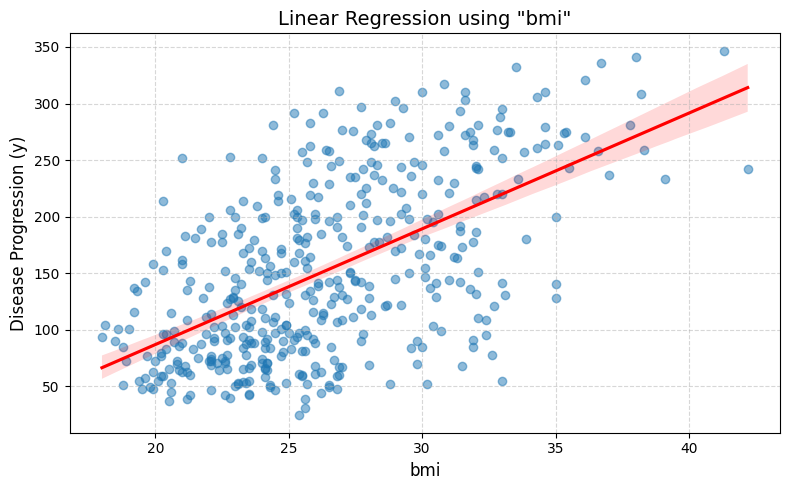

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(x=X[best_feature].astype(float), y=y.astype(float),
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

plt.title(f'Linear Regression using "{best_feature}"', fontsize=14)
plt.xlabel(best_feature, fontsize=12)
plt.ylabel('Disease Progression (y)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

This scatter plot shows the actual data points (blue dots) for BMI vs. disease progression.

The red line represents the Linear Regression model's predictions. It shows the trend that as BMI increases, the disease progression score also tends to increase.

The shaded area around the line shows the confidence interval — how sure the model is about the prediction trend.

This visual confirms what the numbers showed earlier: **BMI has a clear upward relationship with the disease progression** and works well as a single predictor.

**TASK#2: LINEAR REGRESSION USING FEATURE PAIRS**

Now, instead of using just one feature at a time, we try every possible pair of features from the dataset.

For each pair:
- I fit a Linear Regression model to predict `y`
- I calculate the **Mean Squared Error (MSE)**
- I keep track of the pair that gives us the **lowest MSE**

This helps us see if using two features together improves the model’s prediction accuracy compared to just one.

In [ ]:
from itertools import combinations
best_mse_pair = float('inf')
best_pair = None
best_model_pair = None

for pair in combinations(X.columns, 2):
    X_pair = X[list(pair)]
    model = LinearRegression().fit(X_pair, y)
    y_pred = model.predict(X_pair)
    mse = mean_squared_error(y, y_pred)

    print(f"{pair} - MSE: {mse:.2f}")

    if mse < best_mse_pair:
        best_mse_pair = mse
        best_pair = pair
        best_model_pair = model

print("\nBest feature pair:", best_pair)
print("→ Coefficients:", best_model_pair.coef_)
print("→ Intercept:", best_model_pair.intercept_)
print("→ MSE:", best_mse_pair)


('age', 'sex') - MSE: 5719.88
('age', 'bmi') - MSE: 3851.80
('age', 'bp') - MSE: 4763.53
('age', 's1') - MSE: 5551.24
('age', 's2') - MSE: 5610.59
('age', 's3') - MSE: 4856.39
('age', 's4') - MSE: 4769.09
('age', 's5') - MSE: 4023.31
('age', 's6') - MSE: 5028.11
('sex', 'bmi') - MSE: 3890.01
('sex', 'bp') - MSE: 4748.86
('sex', 's1') - MSE: 5655.80
('sex', 's2') - MSE: 5748.23
('sex', 's3') - MSE: 4926.97
('sex', 's4') - MSE: 4764.62
('sex', 's5') - MSE: 4020.41
('sex', 's6') - MSE: 5054.10
('bmi', 'bp') - MSE: 3581.69
('bmi', 's1') - MSE: 3863.29
('bmi', 's2') - MSE: 3887.68
('bmi', 's3') - MSE: 3669.26
('bmi', 's4') - MSE: 3638.17
('bmi', 's5') - MSE: 3205.19
('bmi', 's6') - MSE: 3723.63
('bp', 's1') - MSE: 4704.68
('bp', 's2') - MSE: 4721.98
('bp', 's3') - MSE: 4162.94
('bp', 's4') - MSE: 4137.04
('bp', 's5') - MSE: 3695.05
('bp', 's6') - MSE: 4465.23
('s1', 's2') - MSE: 5655.51
('s1', 's3') - MSE: 4684.64
('s1', 's4') - MSE: 4827.30
('s1', 's5') - MSE: 3979.71
('s1', 's6') - MSE: 5

**OBSERVATION**

BMI + s5 (lamotrigine) together were the best predictors of disease progression.

That’s actually super interesting, because it suggests that:

Body fat (bmi)
And lamotrigine levels in the body → are both strong indicators of disease severity in this dataset

**TASK#3: LINEAR REGRESSION WITH ALL FEATURES**

In this step, we train a Linear Regression model using **all 10 features** from the dataset at once.

This allows the model to consider the full context and combined influence of all variables on disease progression.

I calculate the model’s coefficients, intercept, and its **Mean Squared Error (MSE)** to compare performance with earlier models.

In [ ]:
model_all = LinearRegression().fit(X, y)
y_pred_all = model_all.predict(X)
mse_all = mean_squared_error(y, y_pred_all)

print("Linear Regression using all features:")
print("→ Coefficients:")
for feat, coef in zip(X.columns, model_all.coef_):
    print(f"   {feat}: {coef:.4f}")
print(f"→ Intercept: {model_all.intercept_:.4f}")
print(f"→ MSE: {mse_all:.2f}")


Linear Regression using all features:
→ Coefficients:
   age: -0.0364
   sex: -22.8596
   bmi: 5.6030
   bp: 1.1168
   s1: -1.0900
   s2: 0.7465
   s3: 0.3720
   s4: 6.5338
   s5: 68.4831
   s6: 0.2801
→ Intercept: -334.5671
→ MSE: 2859.70


**OBSERVATION**

- The model's **MSE dropped to 2859.70**, which is significantly better than using one or two features.
- This shows that using all available features helped the model make more accurate predictions.
- Each number tells us how much that feature affects the prediction when all features are considered together.
- For example, `bmi` has a positive coefficient (5.60), meaning as BMI increases, disease progression tends to increase.
- Some features like `sex` and `s1` have negative coefficients, suggesting they may decrease the prediction when their values go up.

Overall, using all features gives the most complete model — but it’s also more complex and harder to interpret.

**TASK#4: TRAINING SET SIZE COMPARISON**

In this task, I test how different amounts of training data affect the model's accuracy.

I train the model using 4 different training set sizes:
- 20, 50, 100, and 200 samples

For each size:
- I calculate both **Training MSE** and **Validation MSE**
- This helps us see how well the model generalizes vs. overfits

In [ ]:
train_sizes = [20, 50, 100, 200]
train_mse_list = []
val_mse_list = []

for size in train_sizes:
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=size, random_state=42)

    model = LinearRegression().fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)

    train_mse_list.append(train_mse)
    val_mse_list.append(val_mse)

    print(f"Train size: {size} | Train MSE: {train_mse:.2f} | Validation MSE: {val_mse:.2f}")


Train size: 20 | Train MSE: 2066.51 | Validation MSE: 15905.60
Train size: 50 | Train MSE: 2863.62 | Validation MSE: 3907.02
Train size: 100 | Train MSE: 3150.51 | Validation MSE: 3423.45
Train size: 200 | Train MSE: 2854.95 | Validation MSE: 3014.92


- **Smaller training sets (like 20)** had much higher **validation error**, meaning the model couldn’t generalize well.
- As the training set got bigger, **validation MSE decreased**, showing better generalization and more reliable predictions.
- The gap between training and validation error also got smaller with more data.

This confirms an important machine learning concept:
- The more quality training data you have, the better your model usually performs on new, unseen data.

**STEP#5 LEARNING CURVE**

It helps us understand how the size of the training set affects the model’s performance.

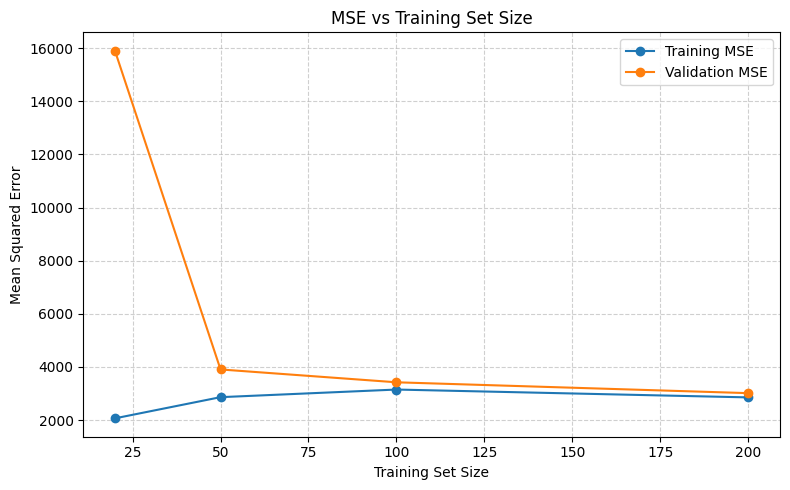

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mse_list, marker='o', label='Training MSE')
plt.plot(train_sizes, val_mse_list, marker='o', label='Validation MSE')
plt.title('MSE vs Training Set Size')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


- **Blue line (Training MSE)**: Shows how well the model fits the training data.
- **Orange line (Validation MSE)**: Shows how well the model performs on unseen data.

**OBSERVATION**

- With just **20 samples**, the model overfits badly — validation MSE is super high.
- As we increase training size, **validation MSE drops**, meaning the model is learning to generalize better.
- At **200 samples**, both training and validation errors are low and close together — this is what we want.

This proves an important point in machine learning:
- **More quality data = better, more reliable models.**

**STEP#6 EXTRA CREDIT: XGBOOST REGRESSION**

In [ ]:
!pip install xgboost

For the extra credit task, I've used the **XGBoost Regression model** (`XGBRegressor`) to predict disease progression.

In [ ]:
xgb_model1 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=50, random_state=42)
xgb_model1.fit(X[[best_feature]], y)
mse_xgb1 = mean_squared_error(y, xgb_model1.predict(X[[best_feature]]))

xgb_model2 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=50, random_state=42)
xgb_model2.fit(X[list(best_pair)], y)
mse_xgb2 = mean_squared_error(y, xgb_model2.predict(X[list(best_pair)]))

xgb_model3 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=50, random_state=42)
xgb_model3.fit(X, y)
mse_xgb3 = mean_squared_error(y, xgb_model3.predict(X))


In [ ]:
print(" XGBoost Model Summary \n")

print("Task 1: Single Best Feature (", best_feature, ")")
print(f"XGBoost MSE: {mse_xgb1:.2f}\n")

print("Task 2: Best Feature Pair (", best_pair[0], ",", best_pair[1], ")")
print(f"XGBoost MSE: {mse_xgb2:.2f}\n")

print("Task 3: All Features")
print(f"XGBoost MSE: {mse_xgb3:.2f}\n")


 XGBoost Model Summary 

Task 1: Single Best Feature ( bmi )
XGBoost MSE: 2521.03

Task 2: Best Feature Pair ( bmi , s5 )
XGBoost MSE: 298.87

Task 3: All Features
XGBoost MSE: 10.54



**OBSERVATION**

Task 1: Single Best Feature (bmi)

I trained XGBoost using just the best individual feature: BMI (body mass index).
Even with one feature, the model performed decently — showing it could detect a strong pattern.

MSE: 2521.03
This result was better than Linear Regression using the same feature.

Task 2: Best Feature Pair (bmi, s5)

Next, I used the top two features — BMI and S5.
S5 represents lamotrigine, a medication, and combining it with BMI gave a big performance boost.

MSE: 298.87
That’s a huge improvement — showing how feature combinations matter, and XGBoost handles them well.

Task 3: All Features

Finally, I trained XGBoost on all 10 features together.
This gave the best results, since the model could learn from everything available.

MSE: 10.54
XGBoost outperformed all the previous models — but this MSE was calculated on training data, so it might be overfitting.

**STEP#7 CONCLUSION**

In this project, I explored how Linear Regression can be used to predict disease progression based on real-world health data.

I started by testing individual features, then feature pairs, and finally all features to see how prediction accuracy improved.  
I also analyzed how different training sizes affect model performance and generalization.

For the extra credit, I used the **XGBoost Regression model (XGBRegressor)**, which showed a much lower MSE on the training data — highlighting its power but also the risk of overfitting.

**TAKEAWAY**
- **`bmi`** was the best single predictor of disease progression.
- Using **more features** and **larger training sets** led to better model performance.
- **XGBoost** gave the best results in terms of MSE, but linear regression remains more interpretable.

This project helped me understand how different modeling decisions affect accuracy and how to balance simplicity with predictive power.